# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 3
*gelöst von Stollmayer Max*

### Aufgabe 1

Sei $y_{n+1} = y_n + h\ \Phi (t_n, y_n, h)$ eine explizite Ein-Schritt-Methode mit $\Phi (t, y, h) = a_1\ f(t,y) + a_2\ f\big(t+b_2\ h,\ y+ b_2\ h\ f(t,y)\big)$ und Koeffizienten $a_1 = \frac{1}{4},\ a_2 = \frac{1}{4},\ b_2 = \frac{2}{3}$ für das Modellproblem sei $y' = \lambda\ y$ mit $\lambda > 0$.

Die Folge $(y_n)_{n \ge 0}$ ist genau dann beschränkt, wenn $-\frac{2}{\lambda} \le h \le 0$ gilt.

#### Beweis
Für $y' = \lambda\ y$ ist $f(t,y) = f(y) = \lambda\ y$. Damit lässt sich $y_{n+1}$ explizit hinschreiben:

\begin{align*}
y_{n+1} &= y_n + h\ \bigg(\frac{1}{4}\ f(y_n) + \frac{1}{4}\ f\big(y_n + \frac{2}{3}\ h\ f(y_n)\big)\bigg) \\
&= y_n + \frac{\lambda}{4}\ h\ y_n + \frac{3\ \lambda}{4}\ h\ \big(y_n + \frac{2\ \lambda}{3}\ h\ y_n\big) \\
&= \big(1 + \frac{\lambda}{4}\ h + \frac{3\ \lambda}{4}\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&= \big(1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)\ y_n \\
&=\ ... \\
&= \big(1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2\big)^{n+1}\ y_0
\end{align*}

Die geometrische Folge $(y_n)_{n \ge 0}$ ist nun genau dann beschränkt, wenn $|1 + \lambda\ h + \frac{\lambda^2}{2}\ h^2| \le 1$ gilt, also äquivalent, wenn gilt $-2 \le \lambda\ h + \frac{\lambda^2}{2}\ h^2 \le 0$.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 + \lambda\ h + 2 > 0 $ gilt für jedes $h \in \mathbb{R}$ und $\lambda > 0$.

$\bullet \quad$ $\frac{\lambda^2}{2}\ h^2 + \lambda\ h \le 0 \iff h\ (\frac{\lambda}{2}\ h + 1) \le 0 \iff \begin{cases}h \le 0 \land \frac{\lambda}{2}\ h + 1 \ge 0 \\ h \ge 0 \land \frac{\lambda}{2}\ h + 1 \le 0 \end{cases} \iff h \le 0 \land h \ge -\frac{2}{\lambda}$

Da für $h \ge 0$ die Ungleichung $\frac{\lambda}{2}\ h + 1 \le 0$ nicht gelten kann, ist nach einer kurzen Umformung die Behauptung $-\frac{2}{\lambda} \le h \le 0$ gezeigt.
<div style="width:12px; height:12px; border:1px solid #000; margin-left:auto; margin-right:0;"></div>

### Aufgabe 2

Zu implementieren ist das Crank-Nicolson-Verfahren mit der Fixpunkt-Iteration:

\begin{cases}
y_{n+1}^{(k+1)} = y_n + \frac{h}{2} \ \big(f(t_n, y_n) + f(t_{n+1},\ y_{n+1}^{(k)})\big), \quad k \ge 0 \\
y_{n+1}^{(0)} = y_n
\end{cases}

und das Rückwärts-Euler-Verfahren mit der Fixpunkt-Iteration:

\begin{cases}
y_{n+1}^{(k+1)} = y_n + h \ f(t_{n+1},\ y_{n+1}^{(k)}), \quad k \ge 0 \\
y_{n+1}^{(0)} = y_n
\end{cases}

#### Definition

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# probiere in class zusammenzufassen und über die hilfsfunktion zu definieren

In [2]:
def fixed_point_iter(f, y, *args, tol=0.001, steps=10000):
    '''
    Nests given function on first positional argument from starting value until desired accuracy is reached,
    otherwise returns last y value after N steps
    '''
    
    # if desired accuracy is reached, returns next value
    if np.allclose(y, f(y, *args), atol=tol):
        return f(y, *args)
    
    # returns last y value after n steps if accuracy is not reached
    elif steps == 0:
        print(f"Fixed-point iteration did not converge. Last value was {y}.")
        return y
    
    else:
        return fixed_point_iter(f, f(y, *args), *args, tol=tol, steps=steps-1)

In [19]:
def test(y, t):
    return t * y**0.5

t0 = 1
y0 = np.array([1,2,3])

fixed_point_iter(test, y0, t0)

array([1.        , 1.00033851, 1.00053658])

In [18]:
np.array([1,2,3])**2

array([1, 4, 9], dtype=int32)

In [3]:
def backward_euler(f, y0, t0, tN, N, tol=0.001):
    h = (tN - t0) / N # step size
    t = t0 + h * np.arange(N+1) # grid of input values
    y = np.array([y0]) # initialize list of function values with initial value
    
    # function for the fixed point iteration
    def g(z, x, c):
        return c + h * f(z, x)
    
    for n in range(0, N):
        new = fixed_point_iter(g, y[n], t[n+1], y[n], tol=tol) # fixed point iteration to find next value
        y = np.append(y, new) # append new value to list
        
    return t, y

In [4]:
def crank_nicolson(f, y0, t0, tN, N, tol=0.001):
    h = (tN - t0) / N # step size
    t = t0 + h * np.arange(N+1) # grid of input values
    y = np.array([y0]) # initialize list of function values with initial value
    
    # function for the fixed point iteration
    def g(z, xn, xn1, yn):
        return yn + h/2 * (f(yn, t[n-1]) + f(z, t[n]))

    for n in range(1, N+1):
        new = fixed_point_iter(g, y[n-1], t[n-1], t[n], y[n-1], tol=tol)
        y = np.append(y, new)
    
    return t, y

#### Test 1

In [5]:
def f1(y, t):
    return y

y0 = 1
t0 = 1
tN = 4
N = 10

In [6]:
t1, y1 = backward_euler(f1, y0, t0, tN, N)
for v in zip(t1, y1):
    print(f"y({v[0]:.2f}) = {v[1]:.2f}")

y(1.00) = 1.00
y(1.30) = 1.43
y(1.60) = 2.04
y(1.90) = 2.91
y(2.20) = 4.16
y(2.50) = 5.95
y(2.80) = 8.50
y(3.10) = 12.14
y(3.40) = 17.34
y(3.70) = 24.77
y(4.00) = 35.38


In [7]:
t2, y2 = crank_nicolson(f1, y0, t0, tN, N)
for v in zip(t2, y2):
    print(f"y({v[0]:.2f}) = {v[1]:.2f}")

y(1.00) = 1.00
y(1.30) = 1.35
y(1.60) = 1.83
y(1.90) = 2.48
y(2.20) = 3.35
y(2.50) = 4.53
y(2.80) = 6.13
y(3.10) = 8.30
y(3.40) = 11.22
y(3.70) = 15.18
y(4.00) = 20.54


##### Method comparison

In [8]:
def forward_euler(f, y0, t0, tN, N):
    '''Returns a list of input values and corresponding function values approximated with the forward Euler method'''
    h = (tN - t0) / N           # increment size
    t = t0 + h * np.arange(N+1) # grid of input values
    y = np.array([y0])          # initializes list with starting value
    for n in range(1, N+1):
        y = np.append(y, [y[n-1] + h * f(t[n-1], y[n-1])], axis = 0) # appends newly calculated value to the list
    return t, y

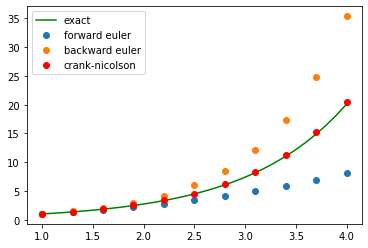

In [11]:
t3, y3 = forward_euler(f1, y0, t0, tN, N)
t4 = np.linspace(1, 4, 30)
y4 = np.exp(t4 - 1)

plt.plot(t4, y4, "g", label = "exact")
plt.plot(t3, y3, "o", label = "forward euler")
plt.plot(t1, y1, "o", label = "backward euler")
plt.plot(t2, y2, "ro", label = "crank-nicolson")
plt.legend()

#### Test 2

In [14]:
def g(t, y, a, b, c, d):
    return np.array([-(a - b * y[1]) * y[0], (c - d * y[0]) *y[1]])

def f2(t,y):
    return g(t, y, 1, 0.1, 4, 1)

t, y = backward_euler(f2, np.array([3,5]), 0, 10, 10)
#for x, z in zip(t, y):
#    print(f"t = {x:2n}:  {z[0]: .2E} Räuber,  {z[1]: .2E} Beute")

IndexError: invalid index to scalar variable.

In [ ]:
print(f(1,[2,3]))